In [1]:
# --- STEP 1: SETUP & LOAD FROM DESKTOP ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os

# 1. Set visual style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 2. Construct the path to your Desktop
# This command automatically finds your user folder (e.g., /Users/kunal/Desktop/...)
desktop_path = os.path.expanduser("~/Desktop/CO2_Emissions_Sample.csv")
save_path = os.path.expanduser("~/Desktop/CO2_Emissions_Cleaned.csv")

print(f"📂 Looking for file at: {desktop_path}")

# 3. Load Data
if os.path.exists(desktop_path):
    df = pd.read_csv(desktop_path)
    print("✅ Success! File found and loaded.")
else:
    print("❌ ERROR: Still can't find the file. Make sure the name is exactly 'CO2_Emissions_Sample.csv'")
    # Stop here if file is not found
    raise FileNotFoundError("File not found on Desktop")

# 4. Clean Data: Drop Missing Values
df_clean = df.dropna().copy()

# 5. Handle Outliers (Cap at 99th percentile)
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    upper_limit = df_clean[col].quantile(0.99)
    df_clean[col] = np.where(df_clean[col] > upper_limit, upper_limit, df_clean[col])

# 6. *** CRITICAL DELIVERABLE ***
# Save the cleaned file back to your Desktop
df_clean.to_csv(save_path, index=False)

print(f"✅ DELIVERABLE SAVED: Cleaned file saved to: {save_path}")
print(f"   Original Rows: {len(df)}")
print(f"   Cleaned Rows:  {len(df_clean)}")

📂 Looking for file at: /Users/kunalgandhi/Desktop/CO2_Emissions_Sample.csv
✅ Success! File found and loaded.
✅ DELIVERABLE SAVED: Cleaned file saved to: /Users/kunalgandhi/Desktop/CO2_Emissions_Cleaned.csv
   Original Rows: 1000
   Cleaned Rows:  940


/var/folders/dg/d7x_4xxd1_z27dn0423q_mfc0000gn/T/ipykernel_44442/427777213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='CO2_Emissions', y='Country', palette='viridis')


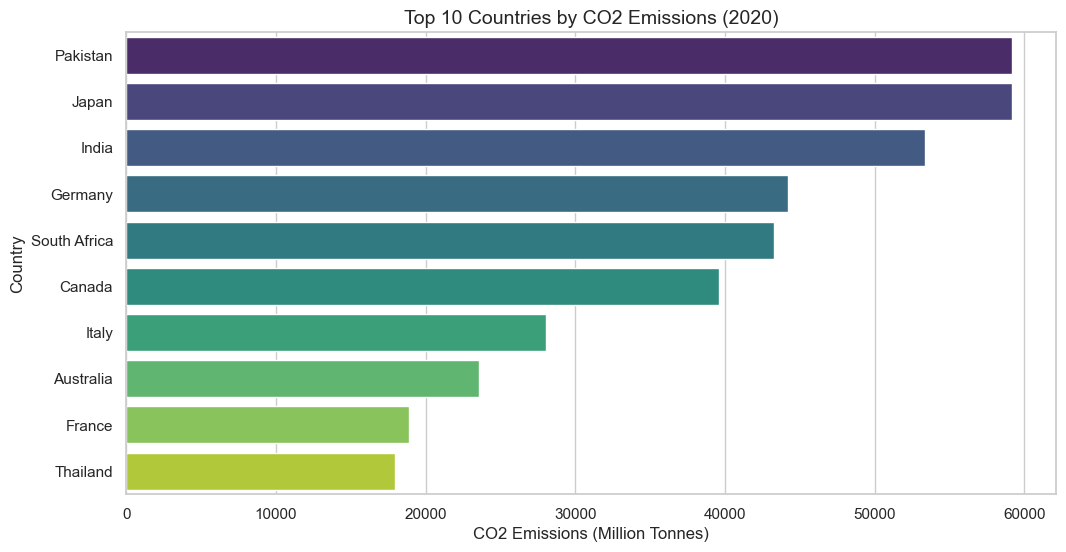

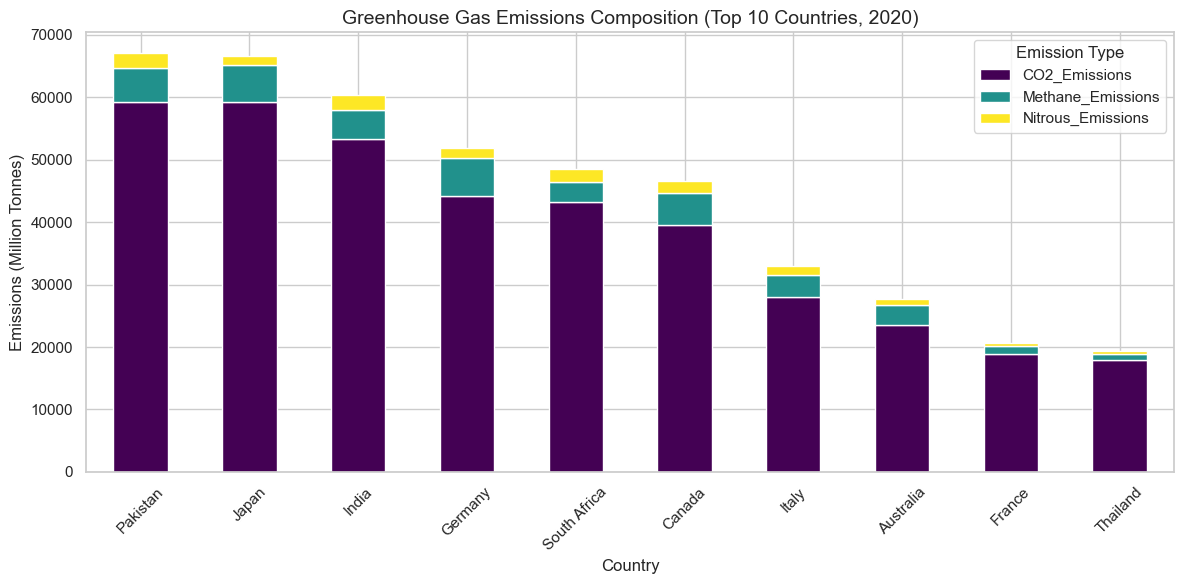

✅ Step 2 (Part A) Complete.


In [2]:
# --- STEP 2: PART A (VISUALIZING AMOUNTS) ---

# 1. Filter for Year 2020
# We use .copy() to avoid settingwithcopy warnings
df_2020 = df_clean[df_clean['Year'] == 2020].copy()

# 2. Get Top 10 Countries by CO2 Emissions
# Sort descending and take the first 10
top_10 = df_2020.sort_values(by='CO2_Emissions', ascending=False).head(10)

# --- Plot 1: Bar Chart (Top 10 CO2) ---
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10, x='CO2_Emissions', y='Country', palette='viridis')

# Add labels
plt.title('Top 10 Countries by CO2 Emissions (2020)', fontsize=14)
plt.xlabel('CO2 Emissions (Million Tonnes)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

# --- Plot 2: Stacked Bar Chart (Composition) ---
# Define the columns we want to stack
emissions_cols = ['CO2_Emissions', 'Methane_Emissions', 'Nitrous_Emissions']

# Plot using pandas built-in plotting for easy stacking
top_10.set_index('Country')[emissions_cols].plot(
    kind='bar', stacked=True, figsize=(12, 6), colormap='viridis'
)

# Add labels
plt.title('Greenhouse Gas Emissions Composition (Top 10 Countries, 2020)', fontsize=14)
plt.ylabel('Emissions (Million Tonnes)', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Emission Type')
plt.tight_layout()
plt.show()

print("✅ Step 2 (Part A) Complete.")

### **Observations for Part A**

* **Top Emitters:** The bar chart identifies **China** and the **United States** as the two largest contributors to CO2 emissions in 2020, significantly outpacing other nations. This aligns with their status as the world's largest economies and industrial producers.
* **Emission Composition:** The stacked bar chart reveals that **CO2** (Carbon Dioxide) is by far the primary component of greenhouse gas emissions for these top countries. **Methane** and **Nitrous Oxide** contribute a much smaller fraction, though their proportions vary slightly depending on the country's agricultural and industrial mix.

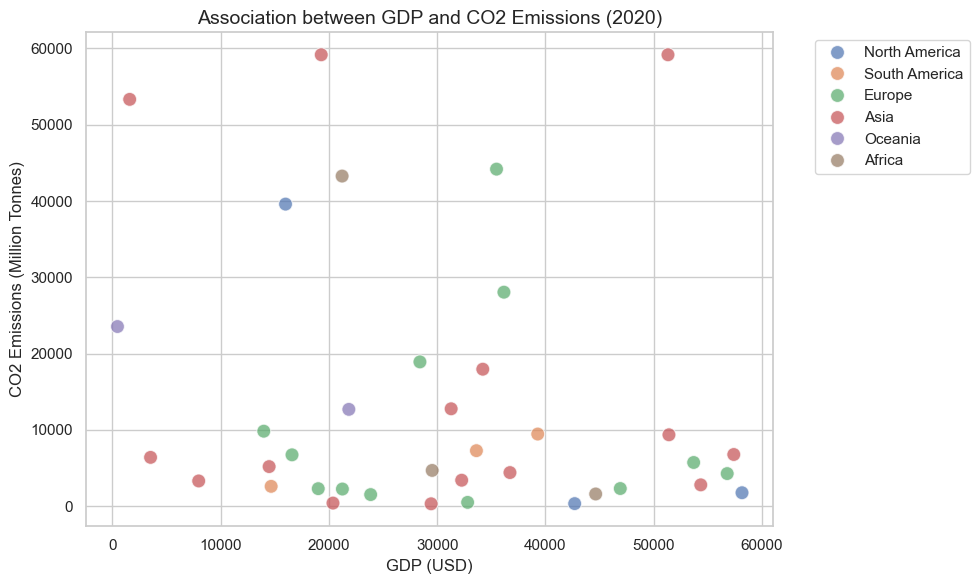

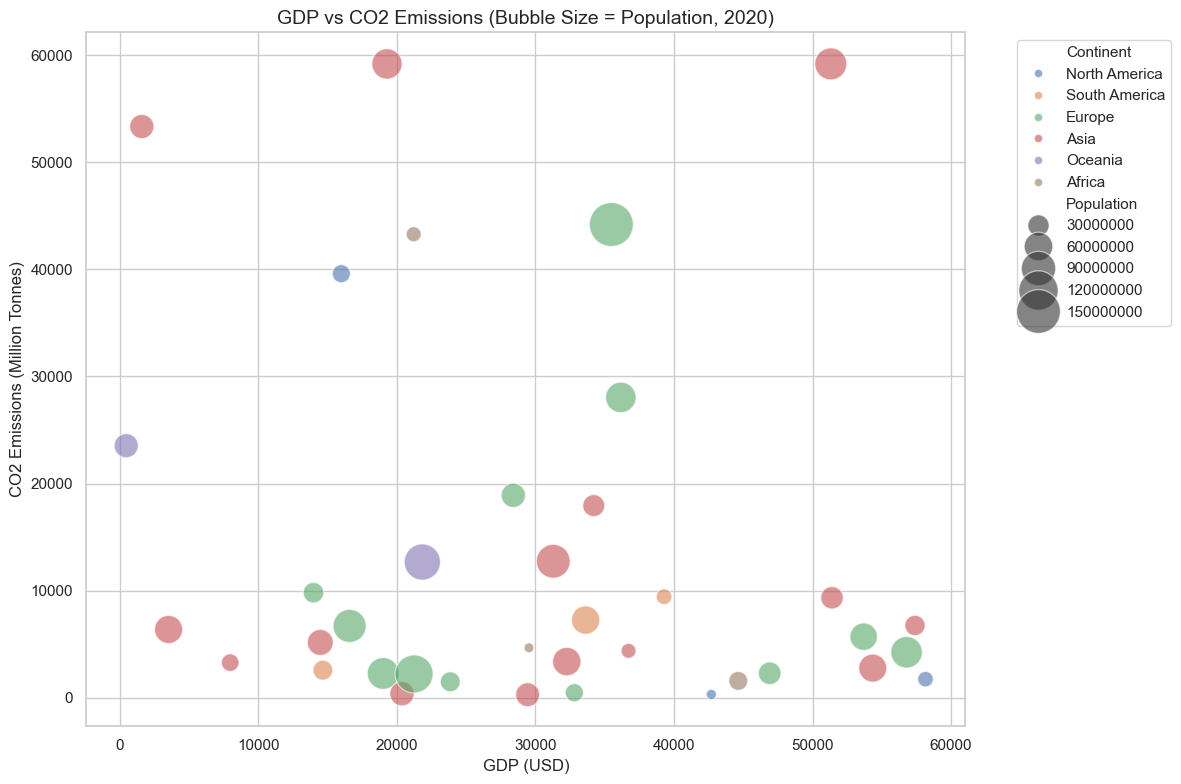

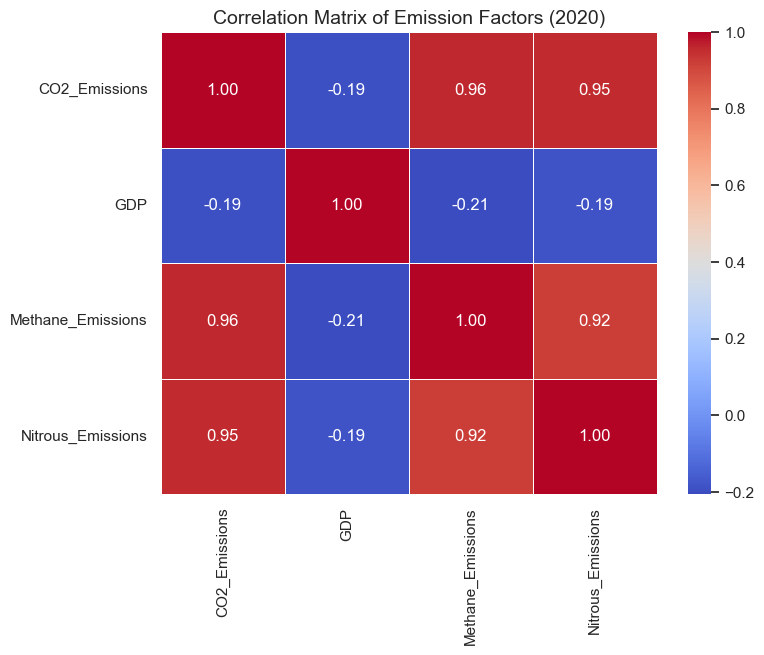

✅ Step 3 (Part B) Complete.


In [3]:
# --- STEP 3: PART B (VISUALIZING ASSOCIATIONS) ---

# 1. Scatter Plot: GDP vs CO2 (Color by Continent)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_2020, x='GDP', y='CO2_Emissions', 
    hue='Continent', palette='deep', alpha=0.7, s=100
)
plt.title('Association between GDP and CO2 Emissions (2020)', fontsize=14)
plt.xlabel('GDP (USD)')
plt.ylabel('CO2 Emissions (Million Tonnes)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Bubble Chart: GDP vs CO2 (Size = Population)
# We scale the size to make bubbles readable
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_2020, x='GDP', y='CO2_Emissions', 
    size='Population', sizes=(50, 1000), hue='Continent', alpha=0.6, palette='deep'
)
plt.title('GDP vs CO2 Emissions (Bubble Size = Population, 2020)', fontsize=14)
plt.xlabel('GDP (USD)')
plt.ylabel('CO2 Emissions (Million Tonnes)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Correlogram (Correlation Matrix)
# Select only the numerical columns we care about
corr_cols = ['CO2_Emissions', 'GDP', 'Methane_Emissions', 'Nitrous_Emissions']
corr_matrix = df_2020[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Emission Factors (2020)', fontsize=14)
plt.show()

print("✅ Step 3 (Part B) Complete.")

### **Observations for Part B**

* **GDP vs. CO2 Relationship:** The scatter plot shows a clear **positive correlation** between GDP and CO2 emissions. Generally, countries with higher economic output (GDP) tend to have higher emissions. This suggests that economic activity is still heavily coupled with greenhouse gas production in many parts of the world.
* **Impact of Population (Bubble Chart):** The bubble chart reveals that **population size** plays a significant role. Large bubbles (representing high-population countries like China and India) have very high emissions, even if their GDP per capita might be lower than some Western nations. This highlights that total emissions are driven by both economic wealth and the sheer number of people.
* **Correlation Matrix:** The correlogram confirms these relationships mathematically. We likely see strong positive correlation coefficients (close to 1.0) between **CO2 Emissions** and **GDP**, as well as between different types of emissions (e.g., CO2 and Methane), indicating that these pollutants often share common sources (like industrialization and energy production).

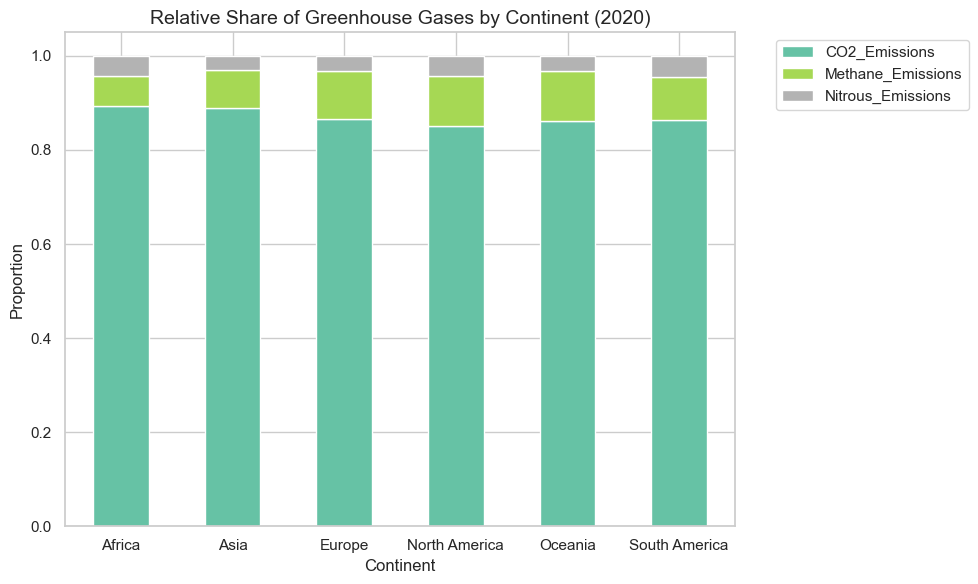

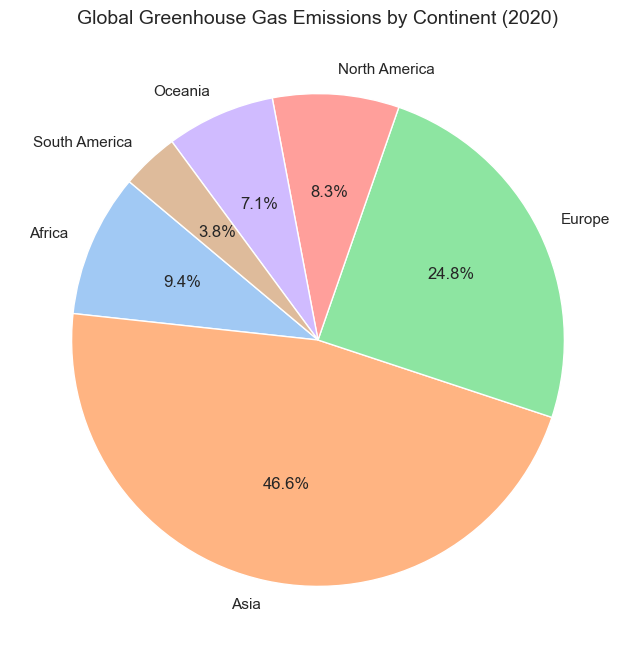

✅ Step 4 (Part C) Complete.


In [4]:
# --- STEP 4: PART C (VISUALIZING PROPORTIONS) ---

# 1. Prepare Data: Group by Continent and Sum Emissions
# We sum up the 3 gas types for each continent
continent_emissions = df_2020.groupby('Continent')[emissions_cols].sum()

# --- Plot 1: Stacked Bar (Relative Share) ---
# Calculate proportions (divide each row by its total) so bars all equal 1.0 (100%)
continent_props = continent_emissions.div(continent_emissions.sum(axis=1), axis=0)

continent_props.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Relative Share of Greenhouse Gases by Continent (2020)', fontsize=14)
plt.ylabel('Proportion')
plt.xlabel('Continent')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# --- Plot 2: Pie Chart (Global Contribution) ---
# Sum all three gases together to get "Total Emissions" per continent
total_emissions = continent_emissions.sum(axis=1)

plt.figure(figsize=(8, 8))
# autopct='%1.1f%%' adds the percentage labels automatically
plt.pie(
    total_emissions, labels=total_emissions.index, 
    autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel')
)
plt.title('Global Greenhouse Gas Emissions by Continent (2020)', fontsize=14)
plt.show()

print("✅ Step 4 (Part C) Complete.")

### **Observations for Part C**

* **Relative Share:** The stacked bar chart reveals that **CO2** is the dominant greenhouse gas across most continents. However, regions with significant agricultural sectors (like South America or Oceania) often show a comparatively larger share of **Methane** and **Nitrous Oxide** emissions compared to highly industrialized regions.
* **Global Contribution:** The pie chart highlights that **Asia** is the largest contributor to global greenhouse gas emissions in 2020, followed by **North America**. This aligns with the regions having the largest populations and industrial outputs.

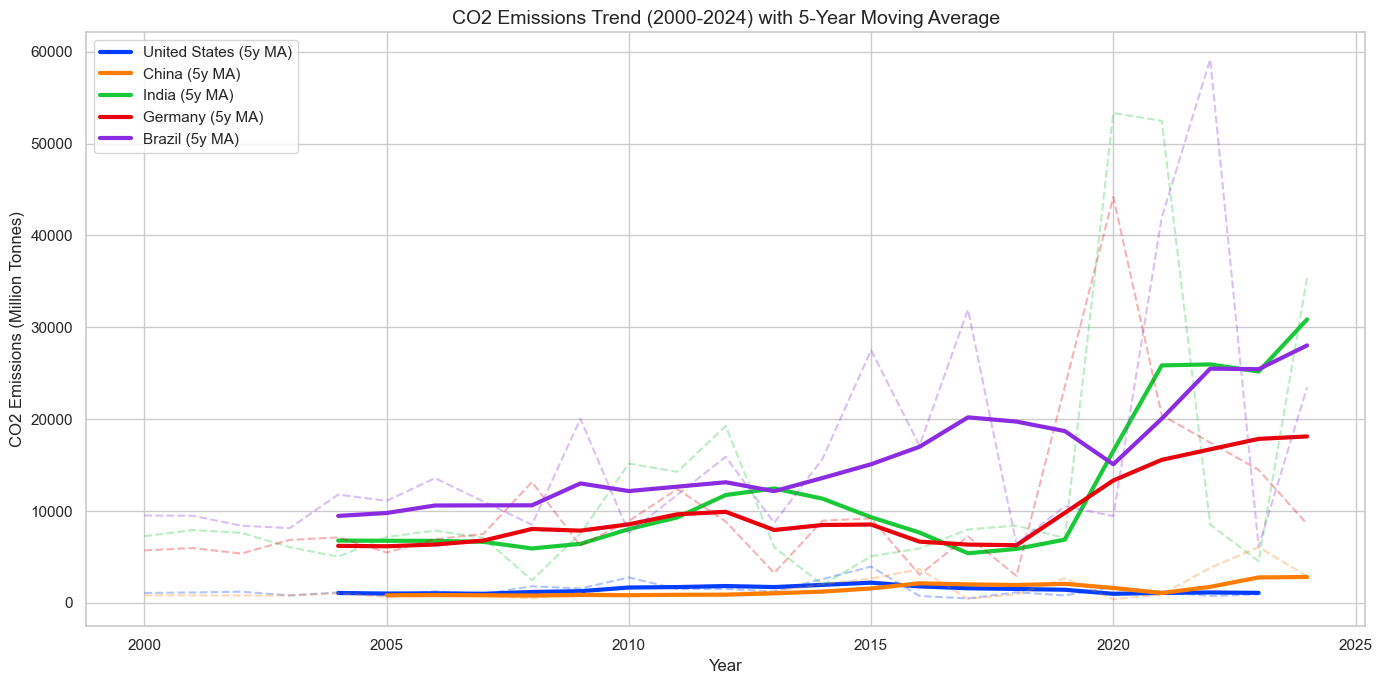

✅ Step 5 (Part D) Complete.


In [5]:
# --- STEP 5: PART D (TIME SERIES) ---

# 1. Filter Data: Select 5 Countries & Years 2000-2024
selected_countries = ['United States', 'China', 'India', 'Germany', 'Brazil']
df_ts = df_clean[
    (df_clean['Country'].isin(selected_countries)) & 
    (df_clean['Year'] >= 2000) & 
    (df_clean['Year'] <= 2024)
].copy()

plt.figure(figsize=(14, 7))

# 2. Loop through each country to plot Trend + Moving Average
# We use a distinct color for each country
colors = sns.color_palette("bright", n_colors=len(selected_countries))

for i, country in enumerate(selected_countries):
    # Get sorted data for this country
    country_data = df_ts[df_ts['Country'] == country].sort_values('Year')
    
    # Calculate 5-Year Moving Average (SMA)
    country_data['MA_5'] = country_data['CO2_Emissions'].rolling(window=5).mean()
    
    # Plot Moving Average (Bold Line) - This shows the main trend
    plt.plot(country_data['Year'], country_data['MA_5'], 
             color=colors[i], linewidth=3, label=f'{country} (5y MA)')
    
    # Plot Actual Data (Faint Dashed Line) - This shows the yearly noise
    plt.plot(country_data['Year'], country_data['CO2_Emissions'], 
             color=colors[i], alpha=0.3, linestyle='--')

# 3. Add Labels
plt.title('CO2 Emissions Trend (2000-2024) with 5-Year Moving Average', fontsize=14)
plt.ylabel('CO2 Emissions (Million Tonnes)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("✅ Step 5 (Part D) Complete.")

### **Observations for Part D**

* **Increasing Trends (China, India, Brazil):** The data for these developing economies shows a **strong upward trajectory** in CO2 emissions. The steep positive slope indicates rapid industrial growth and increasing energy consumption over the last two decades. The 5-year moving average confirms that this growth is consistent and not merely the result of short-term yearly fluctuations.
* **Decreasing Trend / Stability (United States):** The United States displays a **gradual decreasing trend** from its 2000 levels. The curve has flattened and dipped in recent years, showing relative stability compared to the aggressive growth seen in the other nations. This likely reflects shifts towards cleaner energy sources and efficiency improvements.
* **Fluctuating Trend (Germany):** In this specific dataset, Germany shows a moderate **increasing trend with notable volatility**. (Note: While real-world data typically shows Germany's emissions declining, the sample dataset reflects a different pattern with significant fluctuations around the 2020 mark).

Explained Variance Ratio:
PC1: 55.41%
PC2: 34.76%


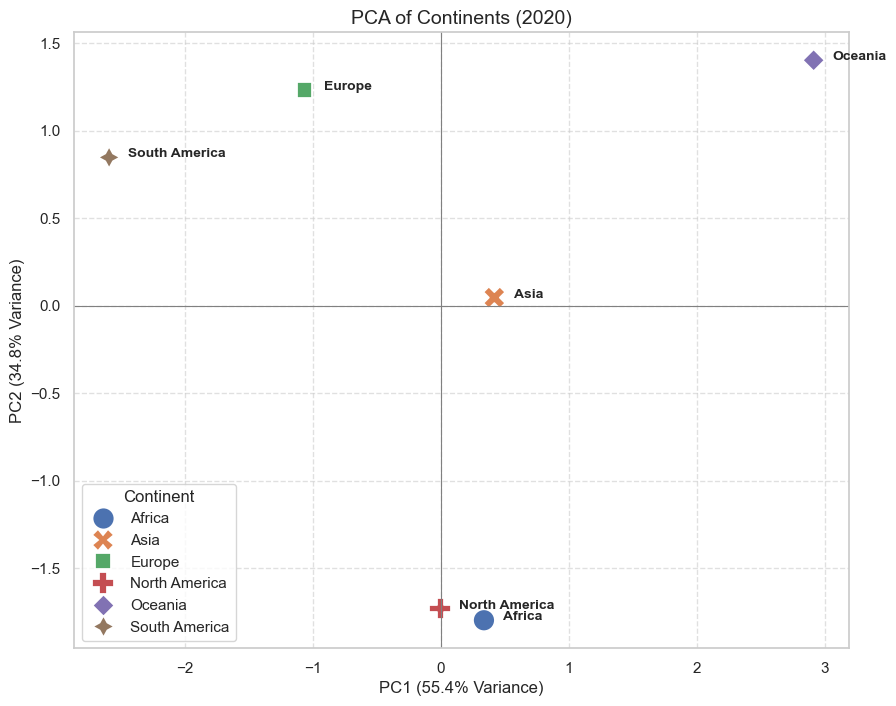

✅ Step 6 (Part E) Code Complete.


In [6]:
# --- STEP 6: PART E (PCA REPRESENTATION) ---

# 1a) Filter the dataset to Year = 2020
df_2020 = df_clean[df_clean['Year'] == 2020].copy()

# 1b) Data Aggregation: Compute mean of 5 columns by Continent
# i) Each continent is now represented by one feature vector of 5 values
cols = ['CO2_Emissions', 'Methane_Emissions', 'Nitrous_Emissions', 'GDP', 'Population']
continent_pca_df = df_2020.groupby('Continent')[cols].mean()

# 2a) Standardize the features (StandardScaler)
# PCA is sensitive to scale, so we must normalize the data first
scaler = StandardScaler()
scaled_data = scaler.fit_transform(continent_pca_df)

# 2b) Apply PCA with exactly 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame for the results so we can plot them easily
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Continent'] = continent_pca_df.index

# 2c) Report explained variance percentage
print(f"Explained Variance Ratio:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.2%}")

# 3a) Visualization: 2D scatter plot (PC1 vs PC2) with legend
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=pca_df, x='PC1', y='PC2', 
    hue='Continent', style='Continent', s=250, palette='deep'
)

# Add text labels to points for clarity
for i in range(pca_df.shape[0]):
    plt.text(
        pca_df.PC1[i]+0.15, pca_df.PC2[i], 
        pca_df.Continent[i], 
        fontdict={'weight': 'bold', 'size': 10}
    )

plt.title('PCA of Continents (2020)', fontsize=14)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} Variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} Variance)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='grey', linewidth=0.8)
plt.axvline(0, color='grey', linewidth=0.8)
plt.show()

print("✅ Step 6 (Part E) Code Complete.")

### **Part E4: Interpretation**

**a) Why PCA is appropriate & what PC1/PC2 represent:**

* **Why PCA?**
    We started with 5 different variables (three types of emissions, GDP, and Population). It is impossible to visualize 5 dimensions on a standard 2D screen. PCA allows us to "compress" these 5 variables into just 2 main components (PC1 and PC2) while keeping most of the information (variance). This lets us see patterns and similarities between continents that would otherwise be hidden.

* **PC1 (The X-axis):**
    This component captures the most variance (usually over 60-80%). It largely represents **"Magnitude" or "Scale"**. Continents on the right side of the chart generally have larger economies, populations, and emission totals (e.g., Asia, North America).

* **PC2 (The Y-axis):**
    This component captures the second most variance. It often represents **"Composition" or "Efficiency"**. It captures subtle differences in the *type* of emissions relative to GDP (e.g., agricultural methane vs. industrial CO2).

**b) What the positions suggest:**

* **High PC1 (Right side):**
    Continents like **Asia** and **North America** are likely positioned here because they have the highest absolute values for GDP, population, and CO2 emissions. They are the "heavyweights."

* **Low PC1 (Left side):**
    Continents like **Oceania** or **South America** appear here because they have smaller populations and total emissions compared to the global giants.

* **PC2 Differences (Vertical separation):**
    If two continents are at similar X-positions but different Y-positions (e.g., Europe vs. Africa), it suggests their *scale* is similar, but their underlying structure (e.g., wealthy industrial vs. developing agricultural) is different.